In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.set_cmap('jet')

class PlotFactory():
  def get_default_plot(self):
    figsize = (8,3)

    fig, ax = plt.subplots(figsize=figsize)

    background_colour = "#E7DACB"
    fig.set_facecolor(background_colour)
    ax.set_facecolor(background_colour)

    # remove all but the bottom spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    return ax

  def get_colourmap(self, n):
    return getattr(plt.cm, "viridis")(np.linspace(0, 25, n))

  def format_plot(self, ax, crag_name):
    ax.set_yticks([])
    ax.set_title(crag_name)
    ax.legend()

<Figure size 432x288 with 0 Axes>

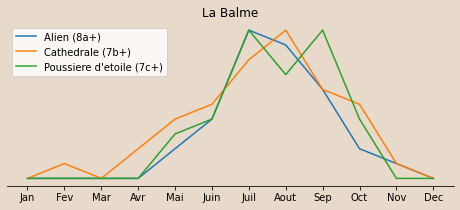

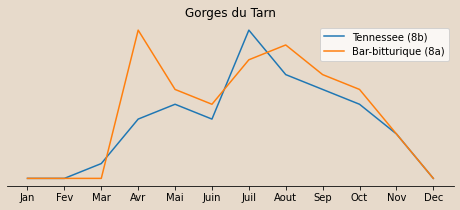

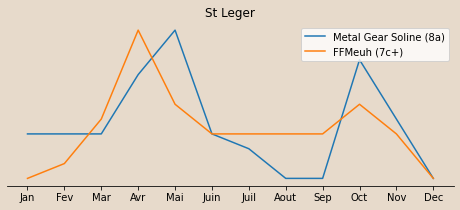

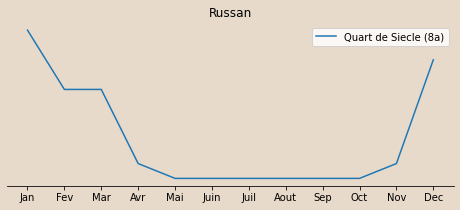

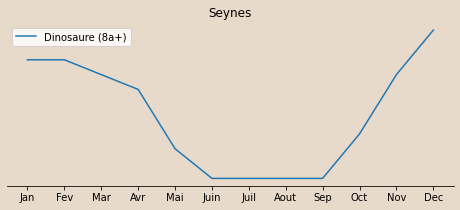

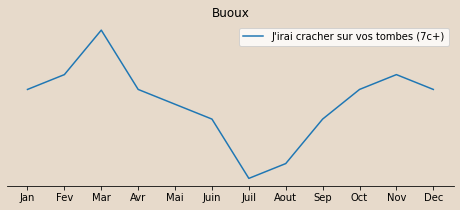

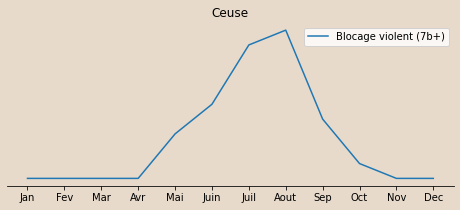

In [3]:
crag_traffic = pd.read_csv("data/crag_traffic.csv")
crag_costs = pd.read_csv("data/crag_cout.csv")

ROUTE_NAME = "Voie"
GRADE = "Cotation"

def plot_route_traffic_at(crag_name, ax, traffic_df):
  routes = traffic_df[crag_traffic.Crag == crag_name]
  for route_name in routes[ROUTE_NAME].unique():
    route_df = routes[routes[ROUTE_NAME] == route_name]
    # indexing a series returns a series so we have to grab the first element
    grade = route_df[GRADE].iloc[0] 

    # plot the 12 months on the x axis against the sends for each month
    ax.plot(routes.columns[-12:], route_df.iloc[0,-12:], label=f"{route_name} ({grade})")

def plot_fact_sheet():
  pass

for crag_name in crag_traffic.Crag.unique():
    plot_manager = PlotFactory()
    ax = plot_manager.get_default_plot()

    plot_route_traffic_at(crag_name, ax, crag_traffic)

    ax = plot_manager.format_plot(ax, crag_name)


In [4]:
crag_costs

,Crag,Peage,Carburant,Peage+Carburant,Km,Temps
0,La Balme,16,22,38,90,65
1,Chambotte,26,30,56,118,82
2,St Leger,32,60,92,234,180
3,Ceuse,32,58,90,225,180
4,Russan,32,59,91,243,178
5,Seynes,32,56,88,230,161
6,Gorges du Tarn,0,72,72,261,248
